# Project 1.2

In [5]:
# Filter all warnings.
# spurious warnings.
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.cluster as skc
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)

In [6]:
artists = pd.read_csv("data/artists.csv",delimiter="\t")
artists.sample(5)

,Artist,Gender,Type,Country,Tags
815,びびあん,Female,Person,JP,"touhou,female vocalists,felt,doujin,doujin ong..."
1754,Charlie Parker & Miles Davis,Male,Person,US,"jazz,bebop,saxophone,blues,bop,american,instru..."
1567,Sam Hulick,Male,Person,US,"Soundtrack,video game music,electronic,game so..."
461,Sophie Hunger,Female,Person,CH,"singer-songwriter,folk,female vocalists,swiss,..."
1524,Jamie xx,Male,Person,GB,"electronic,dubstep,future garage,seen live,UK ..."


In [7]:
# unique list of traits.
all_tags = []

for artist in artists['Tags']:
    if pd.isnull(artist):
        continue
    
    tags = artist.split(',')
    
    for tag in tags:
        tag_new = tag.strip()
        if not tag_new in all_tags:
            all_tags.append(tag_new)

all_tags = sorted(all_tags)
len(all_tags)

17728

In [8]:
# create dummy variables.
tags_dummy = []
for ts in artists['Tags']:
    tis = [0] * len(all_tags)
    
    if pd.isnull(ts):
        tags_dummy.append(tis)
        continue
    
    tags = ts.split(',')
    for t in tags:
        t_new = t.strip()
        tis[all_tags.index(t_new)] = 1
    tags_dummy.append(tis)

In [9]:
# create a DataFrame.
names = artists['Artist']
tags_df = pd.DataFrame(tags_dummy, columns=all_tags, index=names)

In [10]:
# remove insignificant variables
all_totals = []
for tag in all_tags:
    total = tags_df[tag].sum()
    
    if total <= 1:
        print(tag)
        
        tags_df = tags_df.drop(columns=tag)

'90s
- -Haggard- -
- -mems- -
-M-
-miyavi-
-oz-
00s alternative
00s c-pop
00s chinese female vocalists
00s female vocalists
00s j-pop
00s jpop
02-01-2011
0215
0315
0414
0614
0616
08a interested in
0nhaku
1 litre of tears
1 percenters
1 star
1-5
1014
10s chinese female vocalists
10s folk
10s indie
10s japanese female vocalists
111
11get
120 minutes
130626
130816
1337
14 june
1690 cello
18
1800s
1900-1959
1910s
1925-03-26
1959
1966
1970s
1970s Soul
1975
1975-05-05
1980
1981-05-03
1982-06-17
1984
1984-05-30
1985
1985-debut
1987
1987 idol j-pop
1987 j-pop
1987 pop
1990s pop
1990s vibes
1M
1ja
1llionaire
1lord
1st Vine
1st vine acid
2 Pac
2 amazing songwriters
2 mal live
2 of 10 stars
2 pistols
2 times
2-bit
20
2000's
2005
20051022
2006-
2007-
2008 American Idol Winner
2008 debuts
2008-
2008favourite
2009-
2010 Dallas Observer Music Awards nominee
2010 debuts
2010 j-rock
2010 rock
2010-12-09
2011 debuts
2012 j-pop
2012 pop
2013 Winnipeg Folk Festival
2013 k-pop
2013 pop
2013-
2014 debuts
20

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/edel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-c8146aa68f5b>", line 9, in <module>
    tags_df = tags_df.drop(columns=tag)
  File "/home/edel/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py", line 2530, in drop
    obj = obj._drop_axis(labels, axis, level=level, errors=errors)
  File "/home/edel/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py", line 2563, in _drop_axis
    dropped = self.reindex(**{axis_name: new_axis})
  File "/home/edel/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py", line 127, in wrapper
    return func(*args, **kwargs)
  File "/home/edel/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py", line 2935, in reindex
    return super(DataFrame, self).reindex(**kwargs)
  File "/home/edel/anaconda3/lib/python3.6/site-packages/pandas/core/gene

KeyboardInterrupt: 

In [13]:
tags_df = pd.read_csv("data/tags.csv")

In [370]:
tags_df.sample(5)

,,'00s,-,-artist,-malanhoern,0,00's,000,007,00s,...,yy,z,zac efron,zach hill,zara larsson,zavtra,zeroplays,zz,防弾少年団,방탄소년단
Artist,,,,,,,,,,,,,,,,,,,,,
Cascada,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Rage Against the Machine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The fin.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cherry Glazerr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brigitte,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### K MEANS

In [382]:
kmeans_model = skc.KMeans(n_clusters=4)
kmeans_model.fit(tags_df)
centroids = kmeans_model.cluster_centers_
centroids

array([[ 1.78890877e-03,  8.94454383e-04,  8.94454383e-04, ...,
        -1.21430643e-17,  1.78890877e-03,  1.78890877e-03],
       [-8.45677695e-18,  6.28930818e-03,  6.28930818e-03, ...,
        -8.45677695e-18, -3.14418630e-18, -3.14418630e-18],
       [ 1.23304562e-03,  2.46609125e-03,  2.21948212e-02, ...,
         3.69913687e-03, -6.72205347e-18, -6.72205347e-18],
       [-9.75781955e-18, -1.40946282e-17, -6.07153217e-17, ...,
        -9.75781955e-18, -4.55364912e-18, -4.55364912e-18]])

In [400]:
dist_jacc = spd.squareform(spd.pdist(tags_df, 'jaccard'))

In [422]:

dist_jacc_df = pd.DataFrame(dist_jacc)
dist_jacc_df = dist_jacc_df.fillna(1)
dist_jacc_df.columns = tags_df.index
dist_jacc_df.index = tags_df.index

dist_jacc[:4,:4]

array([[0.        , 0.97014925, 0.91764706, 0.94805195],
       [0.97014925, 0.        , 0.90769231, 0.86792453],
       [0.91764706, 0.90769231, 0.        , 0.94936709],
       [0.94805195, 0.86792453, 0.94936709, 0.        ]])

In [384]:
dist_cos = spd.squareform(spd.pdist(tags_df, 'cosine'))
dist_cos[:4,:4]

array([[0.        , 0.93914194, 0.84779012, 0.9006192 ],
       [0.93914194, 0.        , 0.8213526 , 0.76185516],
       [0.84779012, 0.8213526 , 0.        , 0.90275667],
       [0.9006192 , 0.76185516, 0.90275667, 0.        ]])

In [385]:
dist_euc = spd.squareform(spd.pdist(tags_df, 'euclidean'))
dist_euc[:4,:4]

array([[0.        , 8.06225775, 8.83176087, 8.54400375],
       [8.06225775, 0.        , 7.68114575, 6.78232998],
       [8.83176087, 7.68114575, 0.        , 8.66025404],
       [8.54400375, 6.78232998, 8.66025404, 0.        ]])

In [386]:
dist_man = spd.squareform(spd.pdist(tags_df, 'cityblock'))
dist_man[:4,:4]

array([[ 0., 65., 78., 73.],
       [65.,  0., 59., 46.],
       [78., 59.,  0., 75.],
       [73., 46., 75.,  0.]])

Text(0.5,1,'Elbow for K-Means clustering')

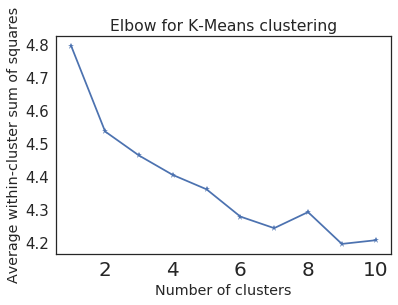

In [387]:
K = range(1,11)  # Apply kmeans 1 to 10
kmeans_models = [skc.KMeans(k).fit(tags_df) for k in K]
centroids = [m.cluster_centers_ for m in kmeans_models]
D_k = [spd.cdist(tags_df, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/tags_df.shape[0] for d in dist]

# plot elbow curve
plt.plot(K, avgWithinSS, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for K-Means clustering')

## Lyrical Analysis

In [68]:
import nltk
import gensim
import pyLDAvis.gensim

In [93]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /home/edel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/edel/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/edel/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/edel/nltk_data...


True

In [341]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

en_stop = nltk.corpus.stopwords.words('english')

en_stop.append("oh")

p_stemmer = nltk.stem.porter.PorterStemmer()

In [194]:
lyrics = pd.read_csv("data/lyrics.csv",delimiter="\t")
lyrics.sample(5)

,Song,Artist,Lyrics
126,メギツネ,BABYMETAL,NaN
455,Haru Haru,Bigbang,NaN
510,Leather Face,Hide,NaN
327,The Book of Right-on (live),Joanna Newsom,NaN
413,Forget You (Clean),CeeLo Green,NaN


In [195]:
lyrics_col = lyrics['Lyrics']

In [306]:
texts = []
texts_tuple = []

for lyric in lyrics_col:
    if pd.isnull(lyric):
        texts.append([])
        continue
    
    raw = lyric.lower()
    
    tokens = tokenizer.tokenize(raw)
    
    stopped = [i for i in tokens if not i in en_stop]
    
    stemmed = [p_stemmer.stem(lyric) for lyric in stopped]
    
    texts.append(stemmed)
    
    texts_tuple += stemmed

In [307]:
dictionary = gensim.corpora.Dictionary(texts)
print(dictionary)

Dictionary(3785 unique tokens: ['3am', '4', 'act', 'alibi', 'alreadi']...)


In [308]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [337]:
num_topics = 4
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=60)

In [338]:
print_lda = ldamodel.print_topics(num_topics=num_topics, num_words=5)

for x in print_lda:
    print(x)

(0, '0.012*"dream" + 0.011*"like" + 0.010*"love" + 0.009*"heart" + 0.008*"night"')
(1, '0.019*"love" + 0.013*"time" + 0.011*"feel" + 0.010*"like" + 0.008*"spend"')
(2, '0.014*"oh" + 0.014*"want" + 0.012*"even" + 0.010*"back" + 0.010*"time"')
(3, '0.013*"know" + 0.013*"thing" + 0.012*"said" + 0.012*"feel" + 0.011*"love"')


In [339]:
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/home/edel/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [347]:
topics = []
for i in range(0, len(texts)):
    topics.append(ldamodel[dictionary.doc2bow(texts[i])][0][0])
    
lyrics["topics"] = topics
print(lyrics["topics"])

0      1
1      0
2      0
3      0
4      0
5      1
6      0
7      3
8      1
9      2
10     2
11     0
12     2
13     1
14     0
15     1
16     3
17     0
18     0
19     3
20     0
21     1
22     1
23     0
24     0
25     0
26     1
27     0
28     1
29     0
      ..
517    0
518    0
519    0
520    0
521    0
522    0
523    0
524    0
525    0
526    0
527    1
528    0
529    0
530    0
531    0
532    0
533    0
534    0
535    0
536    0
537    0
538    0
539    2
540    2
541    0
542    0
543    0
544    0
545    0
546    0
Name: topics, Length: 547, dtype: int64


In [388]:
lyrics.to_csv("lyrics_labels.csv")

In [15]:
artists.head(5)

,Artist,Gender,Type,Country,Tags
0,LADIES' CODE,NaN,Group,KR,"k-pop,Korean,Kpop,girl group,pop,female vocali..."
1,Foo Fighters,NaN,Group,US,"rock,alternative rock,Grunge,alternative,seen ..."
2,浜崎あゆみ,Female,Person,JP,"j-pop,japanese,JPop,female vocalists,Ayumi Ham..."
3,Childish Gambino,Male,Person,US,"Hip-Hop,rap,seen live,indie,underground hip-ho..."
4,Dance Gavin Dance,NaN,Group,US,"post-hardcore,experimental,screamo,hardcore,em..."


## Predictability

In [24]:
tags_df.head(5)

,Artist,Unnamed: 1,'00s,-,-artist,-malanhoern,0,00's,000,007,...,yy,z,zac efron,zach hill,zara larsson,zavtra,zeroplays,zz,防弾少年団,방탄소년단
0,LADIES' CODE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Foo Fighters,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,浜崎あゆみ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Childish Gambino,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dance Gavin Dance,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='zz ~ yy', data=tags_df).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     zz   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.009002
Date:                Mon, 09 Apr 2018   Prob (F-statistic):              0.924
Time:                        18:12:52   Log-Likelihood:                 5291.6
No. Observations:                2675   AIC:                        -1.058e+04
Df Residuals:                    2673   BIC:                        -1.057e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0011      0.001      1.735      0.083      -0.000       0.002
yy            -0.0011      0.012     -0.095      0.924      -0.024       0.022
==============================================================================
Omnibus:                     6978.108   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         88021296.012
Skew:                          29.810   Prob(JB):                         0.00
Kurtosis:                     889.662   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""